# Day 3 - Multi-Linear Regression. 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#We have to predict profit from other features. 

In [21]:
# X = df.iloc[:,:-1].values
# y = df.iloc[:,-1].values

#Do this after Enoding in DF. 
#Or otherwise, Encode in X. 

In [10]:
#Encoding Categorical Data
set(df['State'])

{'California', 'Florida', 'New York'}

In [7]:
encoded_state = pd.get_dummies(df['State'])

In [9]:
#In this, even if we know 2, we know the third. 
#Hence 3 dummies put us into what is called a Dummy Trap. 
#So, we need only 2 Dummies. 
encoded_state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [11]:
encoded_final = encoded_state.iloc[:,:-1]

In [12]:
#There's one other way to dis. 
encode_Direct = pd.get_dummies(df['State'],drop_first=True)
encode_Direct.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [13]:
df = pd.concat([df,encode_Direct],axis=1)

In [16]:
df.head()
df = df.drop('State',axis=1)

In [17]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [18]:
X = df.drop('Profit',axis=1).values
y = df['Profit'].values

In [22]:
#Fitting Multiple REgression.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Note that there's no assignment in the Fit step.

In [29]:
yp = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


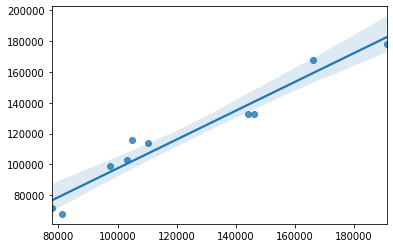

In [36]:
sns.regplot(Y_test,yp)

In [37]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [38]:
yp

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [41]:
from sklearn.metrics import mean_squared_error

In [43]:
rmse = mean_squared_error(Y_test,yp)**0.5

In [44]:
rmse

9137.990152794944

In [46]:
100*rmse/Y_test.mean()

7.473163176248041

In [47]:
# This is a Qualitative Error

In [48]:
#Our Model has a 7.5% Error. 
#It is 92.5% correct/accurate.